# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Yosriko Rahmat Karoni Sabelekake
- **Email:** yosrikosabelekake@gmail.com
- **ID Dicoding:** yosriko

## Menentukan Pertanyaan Bisnis

- Tipe pelanggan apa yang perlu difokuskan untuk meningkatkan penjualan?
- Bagaimana menentukan fokus sales/promosi/ekspansi berdasarkan lokasi geografis pelanggan dan penjual?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

## Data Wrangling

### Gathering Data

In [3]:
orders = pd.read_csv('/content/dataset/olist_orders_dataset.csv')
reviews = pd.read_csv('/content/dataset/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('/content/dataset/olist_order_items_dataset.csv')
products = pd.read_csv('/content/dataset/olist_products_dataset.csv')
sellers = pd.read_csv('/content/dataset/olist_sellers_dataset.csv')
customers = pd.read_csv('/content/dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/dataset/olist_geolocation_dataset.csv')

### Assessing Data

Orders Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


Missing Values in Orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_deliver

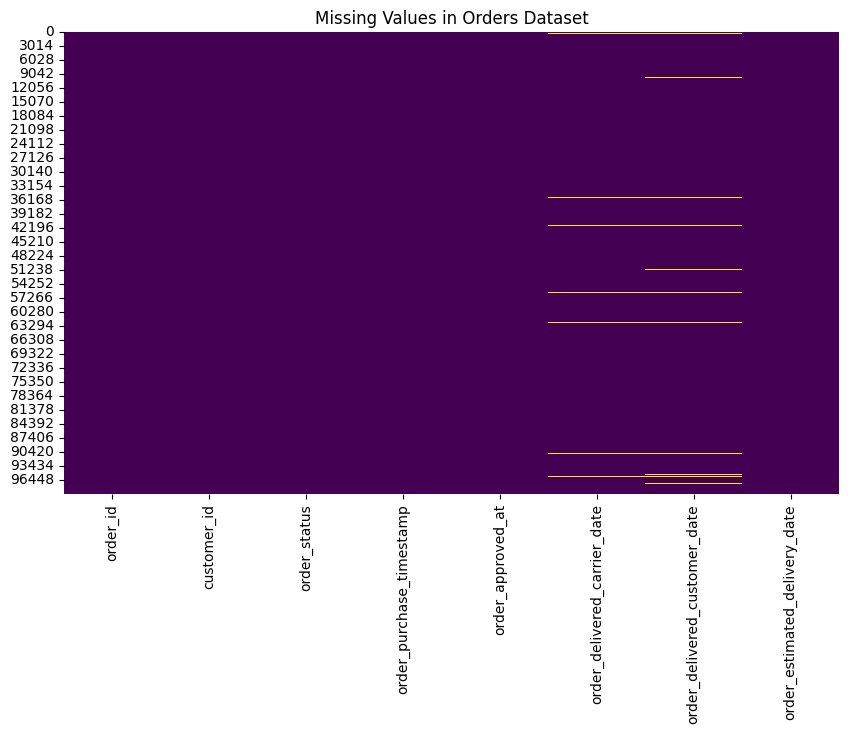

In [4]:
# Memeriksa informasi struktur dataset
datasets = {
    'Orders': orders,
    'Reviews': reviews,
    'Order Items': order_items,
    'Products': products,
    'Sellers': sellers,
    'Customers': customers,
    'Geolocation': geolocation
}

for name, dataset in datasets.items():
    print(f"{name} Dataset Structure:")
    print(dataset.info())
    print("\n")
    print(f"Missing Values in {name}:")
    print(dataset.isnull().sum())
    print("\n")

# Visualisasi jumlah missing values
plt.figure(figsize=(10, 6))
sns.heatmap(orders.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Orders Dataset')
plt.show()


**Insight:**
- Mengetahui kondisi data dan menentukan langkah pembersihan yang diperlukan

### Cleaning Data

Terdapat beberapa bagian memiliki missing values, untuk bagian yang tidak terlalu krusial untuk hasil analisis hanya akan direplace dengan text, namun untuk bagian yang berisikan data quantity yang berpengaruh pada hasil analisis dilakukan imputasi


In [5]:

# Orders Dataset
orders['order_approved_at'].fillna('Unknown', inplace=True)  # Imputasi dengan nilai default atau hapus barisnya
orders['order_delivered_carrier_date'].fillna('Not Delivered', inplace=True)
orders['order_delivered_customer_date'].fillna('Not Delivered', inplace=True)

# Reviews Dataset
reviews['review_comment_title'].fillna('No Title', inplace=True)
reviews['review_comment_message'].fillna('No Comment', inplace=True)

# Products Dataset
products['product_category_name'].fillna('Unknown', inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].median(), inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].median(), inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].median(), inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(), inplace=True)


<ipython-input-5-8787b5935db7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders['order_approved_at'].fillna('Unknown', inplace=True)  # Imputasi dengan nilai default atau hapus barisnya
<ipython-input-5-8787b5935db7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

**Insight:**
- Menghapus data atau row yang berisikan null values


## Exploratory Data Analysis (EDA)

### Explore ...

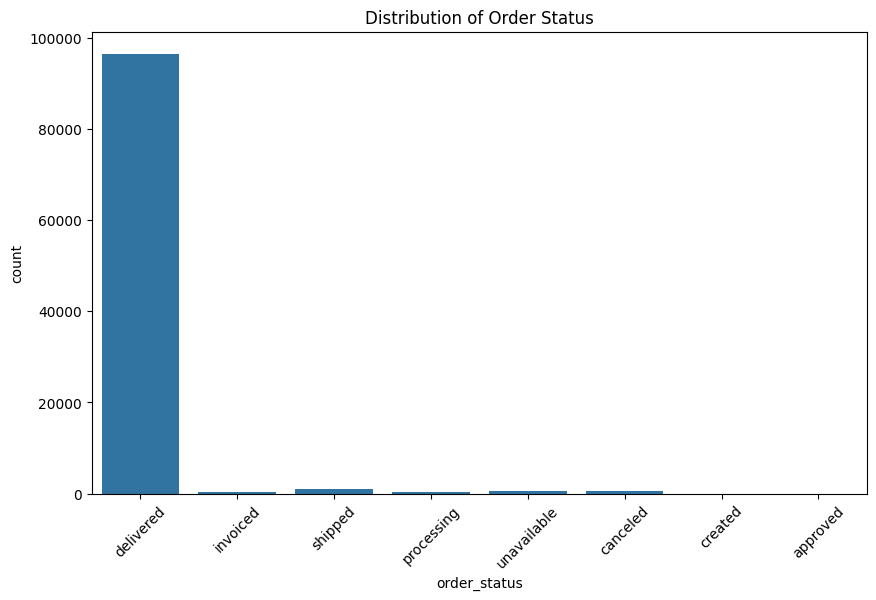

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=orders, x='order_status')
plt.title('Distribution of Order Status')
plt.xticks(rotation=45)
plt.show()

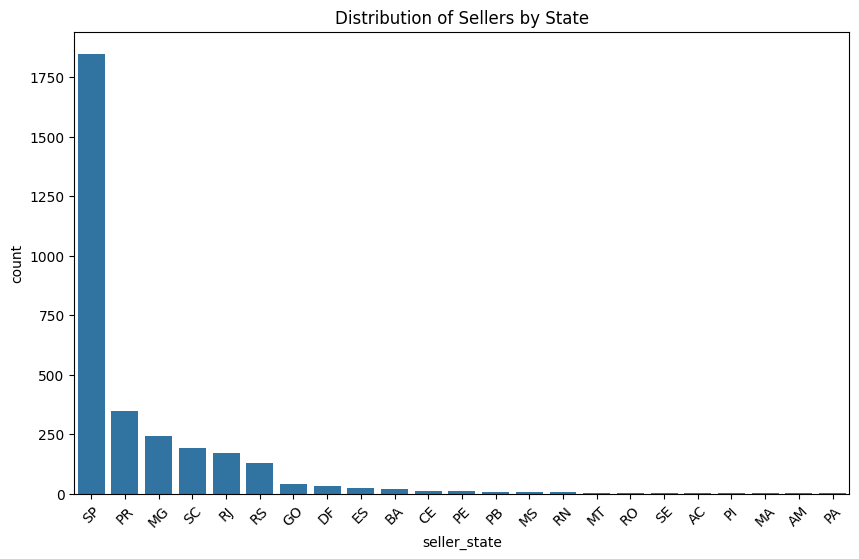

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sellers, x='seller_state', order=sellers['seller_state'].value_counts().index)
plt.title('Distribution of Sellers by State')
plt.xticks(rotation=45)
plt.show()

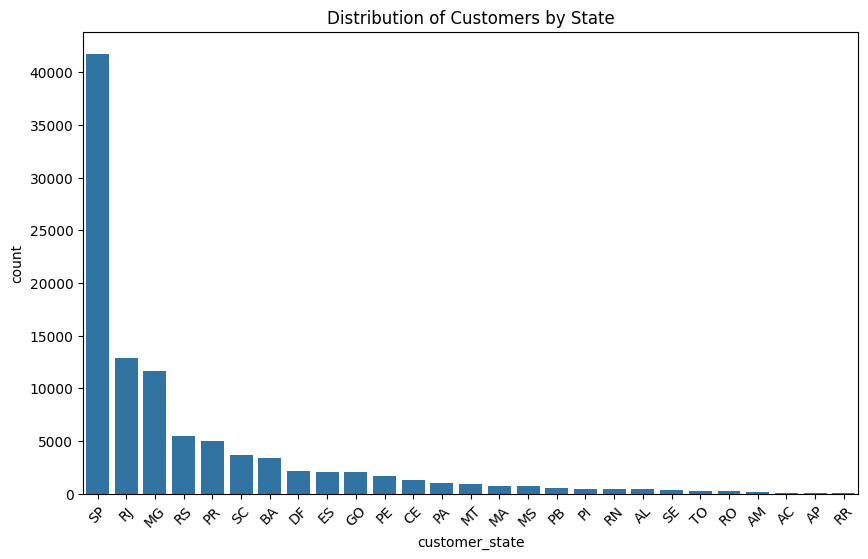

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='customer_state', order=customers['customer_state'].value_counts().index)
plt.title('Distribution of Customers by State')
plt.xticks(rotation=45)
plt.show()

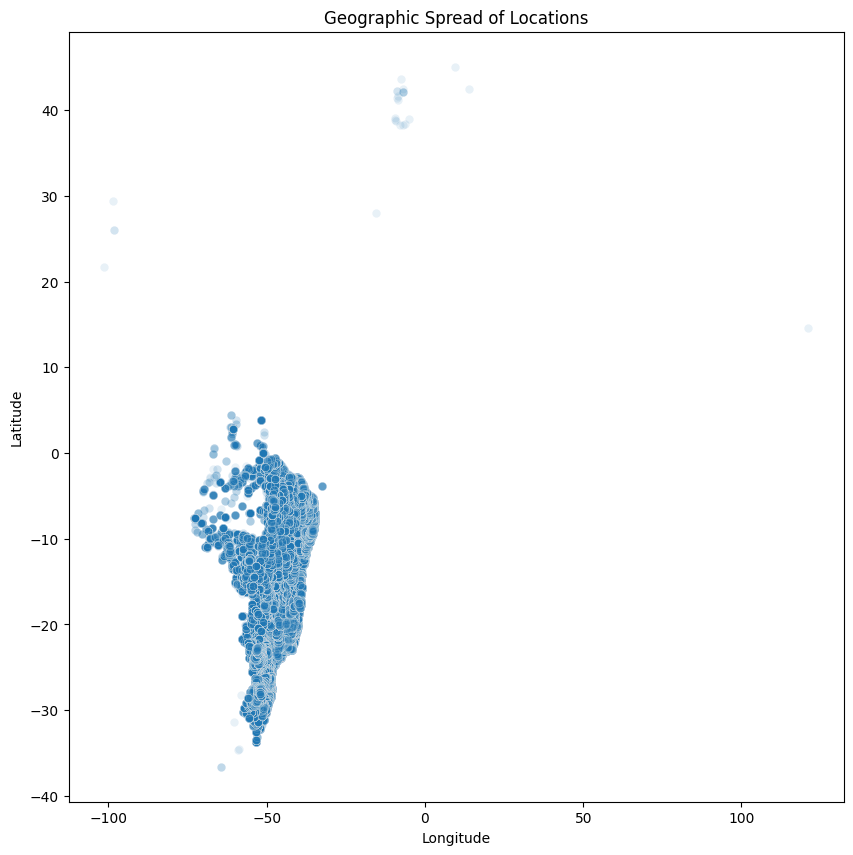

In [9]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=geolocation, x='geolocation_lng', y='geolocation_lat', alpha=0.1)
plt.title('Geographic Spread of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Insight:**
- Mengetahui pola, hubungan, dan distribusi di setiap dataset


## Visualization & Explanatory Analysis

### Pertanyaan 1: Tipe pelanggan apa yang perlu difokuskan untuk menningkatkan penjualan?

In [10]:
import datetime as dt

# Menggabungkan dataset Orders dengan Order Items untuk mendapatkan total pengeluaran
merged_data = pd.merge(orders, order_items, on='order_id')

# Konversi kolom waktu ke tipe datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Menentukan tanggal referensi (misalnya, hari terakhir dalam dataset + 1 hari)
reference_date = merged_data['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Menghitung Recency, Frequency, Monetary untuk setiap customer
rfm = merged_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Memberikan skor R, F, dan M
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]) # Changed line
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])


# Menggabungkan skor R, F, dan M untuk mendapatkan skor RFM
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Menampilkan hasil
print(rfm.head())


                        customer_id  Recency  Frequency  Monetary R_Score  \
0  00012a2ce6f8dcda20d059ce98491703      293          1     89.80       2   
1  000161a058600d5901f007fab4c27140      414          1     54.90       1   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    179.99       1   
3  0002414f95344307404f0ace7a26f1d5      383          1    149.90       1   
4  000379cdec625522490c315e70c7a9fb      154          1     93.00       3   

  F_Score M_Score RFM_Score  
0       1       3       213  
1       1       2       112  
2       1       4       114  
3       1       3       113  
4       1       3       313  


<ipython-input-11-1335570c9051>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_heatmap = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].mean().unstack()


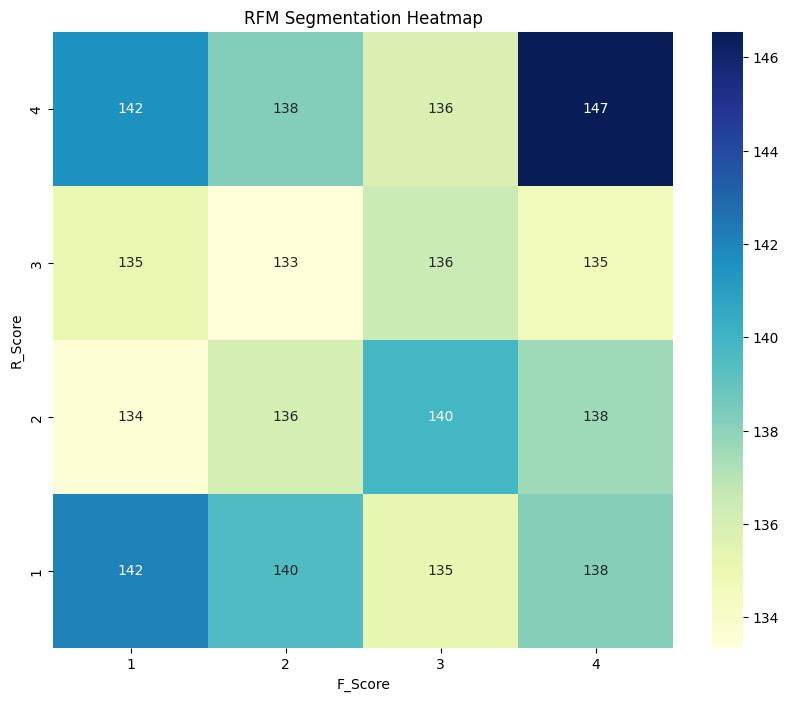

In [11]:
import numpy as np

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=range(4, 0, -1))
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=range(1, 5))
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=range(1, 5))
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm_heatmap = rfm.groupby(['R_Score', 'F_Score'])['Monetary'].mean().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(rfm_heatmap, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('RFM Segmentation Heatmap')
plt.show()


**Insight**

Melihat hubungan antara recency, frekuensi, dan nilai moneter rata-rata. Skor frekuensi tinggi dan recency rendah (kiri atas) biasanya menunjukkan pelanggan setia yang merupakan pembeli baru dan sering.


### Pertanyaan 2: Bagaimana menentukan fokus sales/promosi/ekspansi berdasarkan lokasi geografis pelanggan dan penjual?

In [3]:
# Merge customers with geolocation
customers_geo = pd.merge(customers, geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Merge sellers with geolocation
sellers_geo = pd.merge(sellers, geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

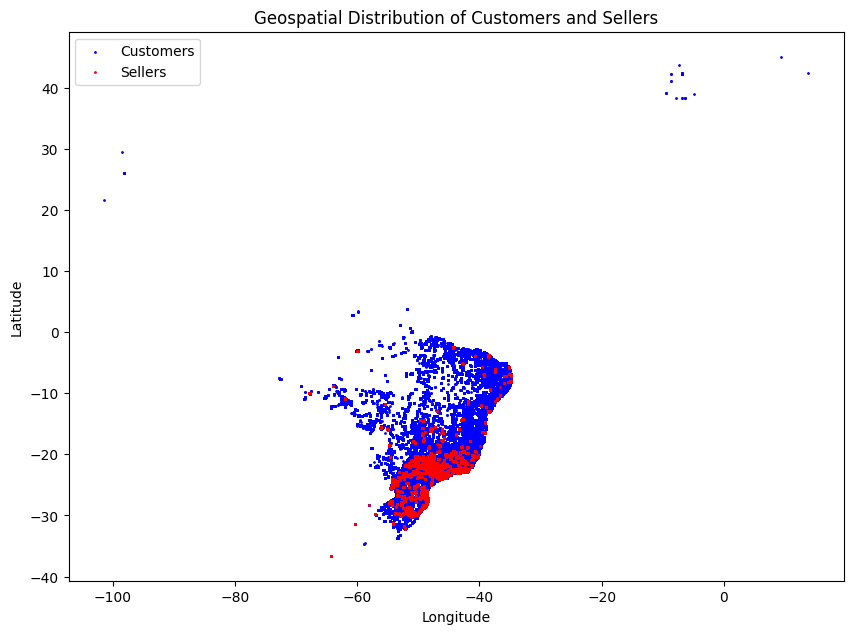

In [13]:
# Convert to GeoDataFrame
customers_gdf = gpd.GeoDataFrame(customers_geo, geometry=gpd.points_from_xy(customers_geo.geolocation_lng, customers_geo.geolocation_lat))
sellers_gdf = gpd.GeoDataFrame(sellers_geo, geometry=gpd.points_from_xy(sellers_geo.geolocation_lng, sellers_geo.geolocation_lat))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
customers_gdf.plot(ax=ax, markersize=1, color='blue', label='Customers')
sellers_gdf.plot(ax=ax, markersize=1, color='red', label='Sellers')

plt.legend()
plt.title('Geospatial Distribution of Customers and Sellers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


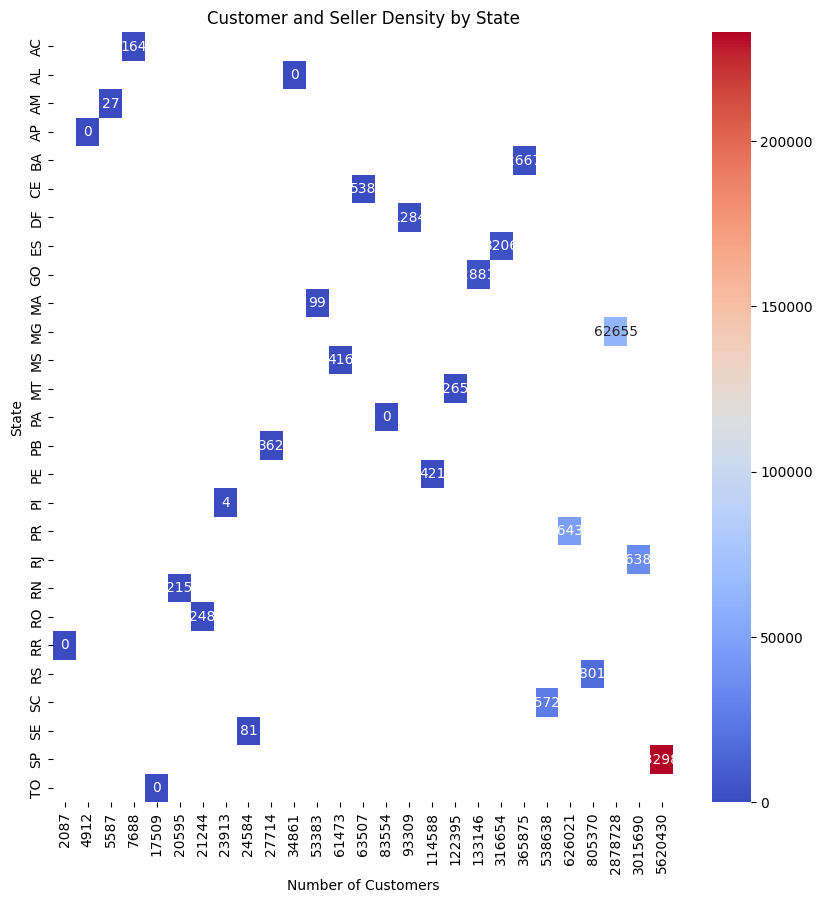

In [15]:

customers_by_state = customers_gdf.groupby('geolocation_state').size().reset_index(name='num_customers')
sellers_by_state = sellers_gdf.groupby('geolocation_state').size().reset_index(name='num_sellers')

# Merge customer and seller counts
location_data = pd.merge(customers_by_state, sellers_by_state, on='geolocation_state', how='outer').fillna(0)

# Heatmap based on customer density
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the density by state

heatmap_data = location_data.pivot(index='geolocation_state', columns='num_customers', values='num_sellers')

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', ax=ax)


# Add labels and title
plt.title('Customer and Seller Density by State')
plt.xlabel('Number of Customers')
plt.ylabel('State')

# Display the map
plt.show()


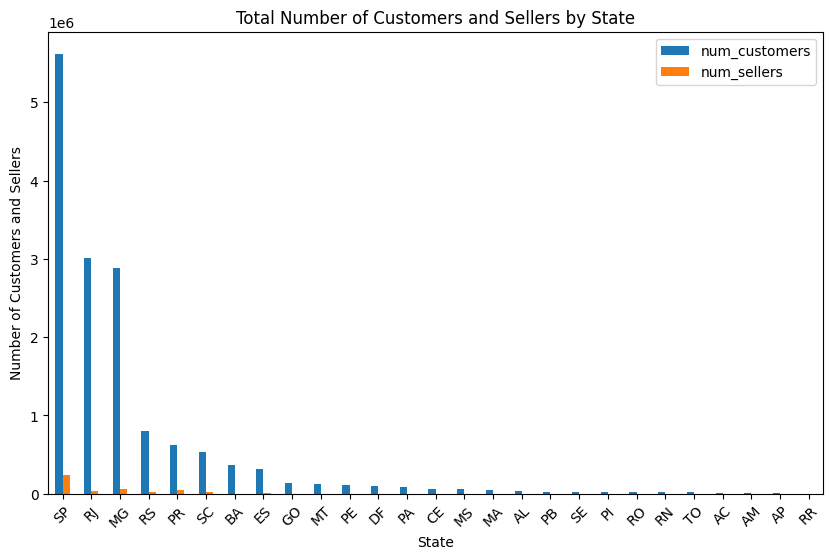

In [16]:
# Create bar chart to compare the total number of customers and sellers by state
fig, ax = plt.subplots(figsize=(10, 6))

# Sort the data to display the most relevant regions
location_data = location_data.sort_values('num_customers', ascending=False)

# Plot customers and sellers in a grouped bar chart
location_data.plot(kind='bar', x='geolocation_state', y=['num_customers', 'num_sellers'], ax=ax)

# Add labels and title
plt.title('Total Number of Customers and Sellers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers and Sellers')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()


In [17]:
# Total customers and sellers per region
total_customers = customers_gdf['geolocation_state'].value_counts()
total_sellers = sellers_gdf['geolocation_state'].value_counts()

# Print summary statistics
print("Total Number of Customers by State:")
print(total_customers)

print("\nTotal Number of Sellers by State:")
print(total_sellers)


Total Number of Customers by State:
geolocation_state
SP    5620430
RJ    3015690
MG    2878728
RS     805370
PR     626021
SC     538638
BA     365875
ES     316654
GO     133146
MT     122395
PE     114588
DF      93309
PA      83554
CE      63507
MS      61473
MA      53383
AL      34861
PB      27714
SE      24584
PI      23913
RO      21244
RN      20595
TO      17509
AC       7688
AM       5587
AP       4912
RR       2087
Name: count, dtype: int64

Total Number of Sellers by State:
geolocation_state
SP    232988
MG     62655
PR     46436
RJ     36387
SC     25729
RS     18014
ES      3206
GO      2881
BA      2667
DF      1284
CE       538
PE       421
MS       416
PB       362
MT       265
RO       248
RN       215
AC       164
MA        99
SE        81
AM        27
PI         4
Name: count, dtype: int64


**Insight:**

1. Penjual terkonsentrasi di wilayah tenggara Brasil, sementara pelanggan lebih tersebar luas, terutama di wilayah utara dan barat laut. Hal ini menunjukkan pusat ekonomi utama dan potensi kesenjangan distribusi.

2. Wilayah dengan banyak pelanggan tapi sedikit penjual, terutama di luar pusat kota besar, menawarkan peluang ekspansi bisnis dan peningkatan logistik untuk mengurangi waktu pengiriman dan biaya.

## Analisis Lanjutan (Opsional)

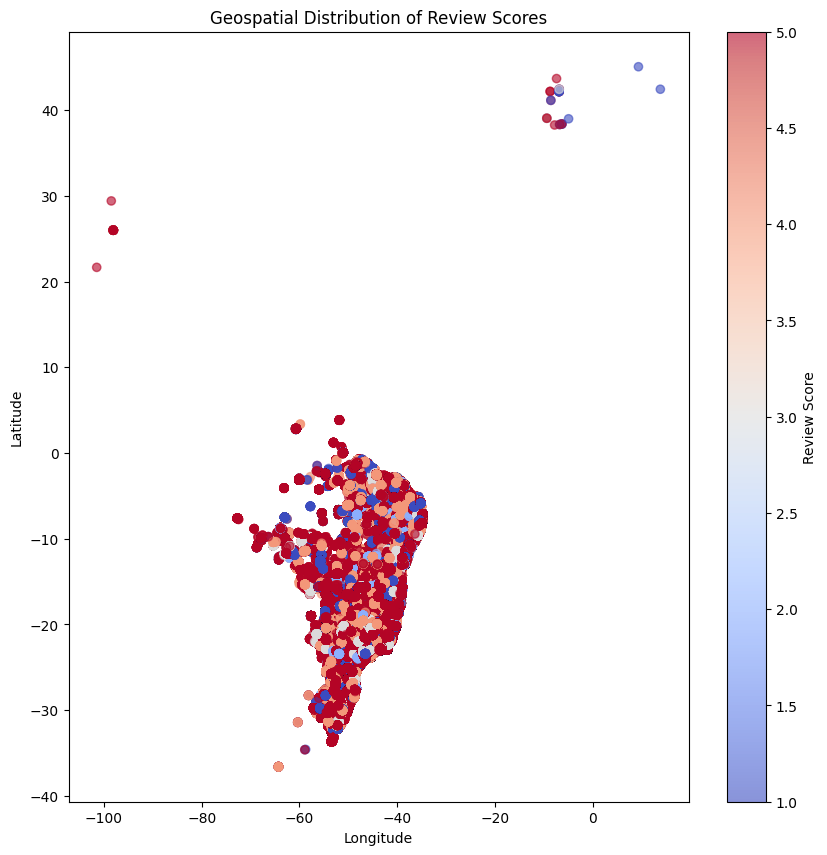

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


orders = pd.read_csv('/content/dataset/olist_orders_dataset.csv')
reviews = pd.read_csv('/content/dataset/olist_order_reviews_dataset.csv')


# Merge reviews with orders and customers data
reviews_geo = pd.merge(reviews, orders, on='order_id')
reviews_geo = pd.merge(reviews_geo, customers_geo, on='customer_id')

# Plot review scores based on geolocation
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(reviews_geo['geolocation_lng'], reviews_geo['geolocation_lat'], c=reviews_geo['review_score'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Review Score')
plt.title('Geospatial Distribution of Review Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Insight**

Jika dibandingkan dengan hasil visualisasi geospatial, rating rendah berasal dari daerah yang memiliki seller lebih sedikit. Meskipun terdapat faktor lain yang mempengaruhi, tetapi ketersediaan seller kemungkinan mempengaruhi kepuasan pelanggan.

## Conclusion

- Conclution pertanyaan 1

Pelanggan yang perlu difokuskan untuk meningkatkan penjualan adalah mereka dengan nilai F (Frequency) dan R (Recency) yang tinggi, berdasarkan heatmap RFM. Pelanggan di segmen ini sering berbelanja dan baru saja melakukan transaksi, menunjukkan loyalitas tinggi dan potensi nilai yang besar. Upaya seperti program loyalitas, diskon eksklusif, atau penawaran khusus dapat membantu mempertahankan mereka, sementara pelanggan dengan frekuensi tinggi tapi waktu pembelian terakhir yang lama dapat ditargetkan dengan kampanye reaktivasi.

- Conclution pertanyaan 2

Untuk fokus sales, promosi, atau ekspansi, analisis penyebaran geografis menunjukkan bahwa wilayah dengan konsentrasi titik biru, yang mewakili pelanggan, adalah area utama untuk promosi (SP, MG, RJ, RS, PR). Fokuskan aktivitas penjualan di area ini untuk memaksimalkan potensi penjualan. Di sisi lain, area dengan sedikit titik dapat dipertimbangkan untuk strategi ekspansi, karena ada potensi pasar yang belum tergarap di sana.